# Removing outliers for weights

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.shape


(8555, 3)

In [7]:
df.isnull().sum()


Gender    0
Height    0
Weight    0
dtype: int64

<Axes: xlabel='Weight', ylabel='Count'>

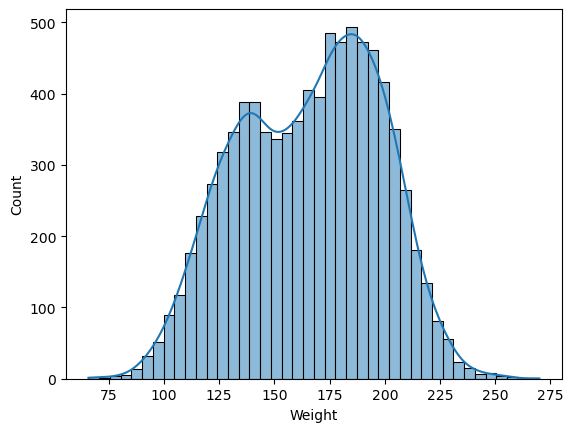

In [8]:
sns.histplot(df['Weight'],kde=True)

In [10]:
mean_value= df['Weight'].mean()
mean_value

165.6327353266768

In [11]:
std_value = df['Weight'].std()
std_value

32.04392221721549

In [12]:
std_3 = mean_value + (2.5*std_value)
std_3

245.74254086971553

In [13]:
neg_std_3 = mean_value - (2.5*std_value)
neg_std_3

85.52292978363808

In [14]:
outlier = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]
outlier

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151


In [15]:
remove_outlier_df = df[(df['Weight']<std_3) & (df['Weight']>neg_std_3)]
remove_outlier_df.shape

(8528, 3)

# Removing Outliers for heights

<Axes: xlabel='Height', ylabel='Count'>

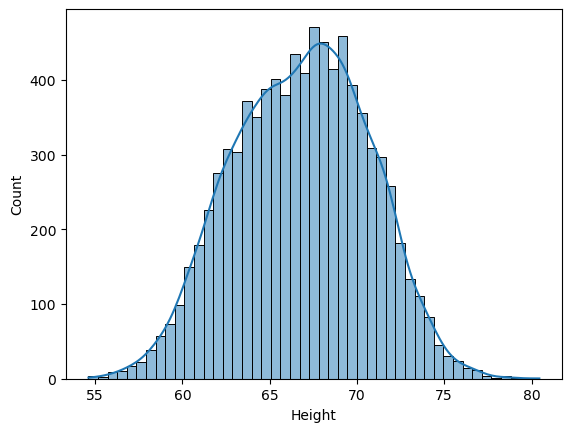

In [16]:
sns.histplot(df['Height'],kde=True)

In [22]:
mean_value_h = remove_outlier_df['Height'].mean()
mean_value_h

66.80728482254457

In [23]:
std_value_h = remove_outlier_df['Height'].std()
std_value_h

3.8183448818969206

In [24]:
std_3_h = mean_value_h + (2.5*std_value_h)
std_3_h

76.35314702728688

In [25]:
neg_std_3_h = mean_value_h - (2.5*std_value_h)
neg_std_3_h

57.261422617802275

In [28]:
outlier_height = remove_outlier_df[(remove_outlier_df['Height']>std_3_h) | (remove_outlier_df['Height']<neg_std_3_h)]
outlier_height.shape

(53, 3)

In [29]:
final_df = remove_outlier_df[(remove_outlier_df['Height']>neg_std_3_h) & (remove_outlier_df['Height']<std_3_h)]
final_df.shape

(8475, 3)

# One Hot Encoding

In [30]:
dummy_variables = pd.get_dummies(final_df['Gender'],drop_first=True)
dummy_variables.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [31]:
final_df = final_df.drop('Gender',axis=1)#removing categorical column gender, dropping column so axis 1
final_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [32]:
new_df = pd.concat([final_df,dummy_variables],axis=1) #concat two data frames
new_df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


# Training and Testing with Linear Regression Model

In [33]:
#splitting data for training and testing
x = new_df.drop('Height',axis=1)#getting feature data
x.shape



(8475, 2)

In [35]:
y = new_df['Height']#getting label data
y.shape

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=48)
xtrain.shape

(5932, 2)

In [38]:
xtest.shape

(2543, 2)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()#creating linear regression object
lr.fit(xtrain,ytrain)#training model with training data

LinearRegression()

In [40]:
lr.coef_#checking coefficient

array([ 0.12156323, -0.97697684])

In [42]:
lr.intercept_

47.24466819087129

In [43]:
lr.predict(xtest)#testing

array([68.48280515, 62.83246434, 68.47438091, ..., 64.1129246 ,
       66.65868014, 63.72847096])

In [44]:
lr.score(xtest,ytest)#checking accurecy

0.8578806013271079

# Finding Mean Squared Error and Accuracy

In [45]:
from sklearn.metrics import mean_squared_error,r2_score

In [46]:
pred = lr.predict(xtest)

In [47]:
mean_squared_error(ytest,pred)#error for predicted values

2.0652447255706754

In [49]:
r2_score(ytest,pred)#accurecy or r squared value for predicted values

0.8578806013271079